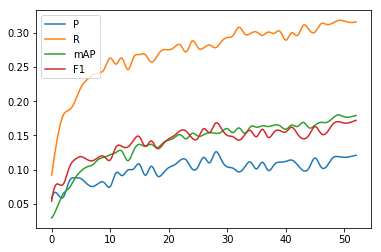

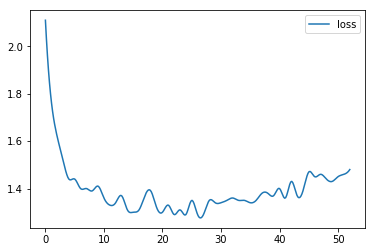

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

with open("results.txt") as f:
    results = f.read()

def smooth(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    return x_new, spl(x_new)

epoch = []
precision = []
recall = []
mAP = []
F1 = []
loss = []
for line in results.split("\n")[1:]:
    if line == "":
        continue
    values = line.split()
    epoch.append(float(values[0].split("/")[0]))
    precision.append(float(values[9]))
    recall.append(float(values[10]))
    mAP.append(float(values[11]))
    F1.append(float(values[12]))
    loss.append(float(values[13]))

epoch = np.array(epoch)
precision = np.array(precision)
recall = np.array(recall)
mAP = np.array(mAP)
F1 = np.array(F1)
loss = np.array(loss)

plt.plot(*smooth(epoch, precision), label="P")
plt.plot(*smooth(epoch, recall), label="R")
plt.plot(*smooth(epoch, mAP), label="mAP")
plt.plot(*smooth(epoch, F1), label="F1")
plt.legend()
plt.show()

plt.plot(*smooth(epoch, loss), label="loss")

plt.legend()
plt.show()